In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import rosen
A = np.array([[4, 1], [1, 2]])
b = np.array([1,  -3.])
def qfunc(x1, x2):
    x = np.array([x1, x2])
    return 0.5 * x.dot(A.dot(x)) + b.dot(x)
def grad(x):
    return A.dot(x) + b
qfunc = np.vectorize(qfunc)

In [38]:
points = np.loadtxt("nm_quad.txt")
xy1 = np.array(list(zip(points[:,0], points[:,1])))
xy2 = np.array(list(zip(points[:,2], points[:,3])))

xy3 = np.array(list(zip(points[:,4], points[:,5])))


In [11]:
xy1[:,0]

array([-1.        , -1.        , -0.25      ,  0.        ,  0.125     ,
        0.0625    , -0.25      , -0.25      ,  0.09375   ,  0.09375   ,
        0.109375  ,  0.109375  ,  0.109375  ,  0.12084961,  0.12084961,
        0.15557861,  0.15557861,  0.28627014,  0.28627014,  0.28627014,
        0.40970898,  0.40970898,  0.40970898,  0.63705635,  0.63705635,
        0.60079265,  0.60079265,  0.7807247 ,  0.7807247 ,  0.7807247 ,
        0.7807247 ,  0.81737033,  0.81737033,  0.81737033,  0.83847266,
        0.83847266,  0.83473921,  0.83473921,  0.83473921,  0.8523923 ,
        0.8523923 ,  0.8523923 ,  0.9122807 ,  0.9122807 ,  0.9208537 ,
        0.9208537 ,  0.92939605,  0.92939605,  0.98501328,  0.98501328,
        0.98714887,  0.98714887,  1.00051161,  1.00051161,  1.00051161,
        0.998499  ,  0.998499  ,  0.998499  ,  0.9996669 ,  0.9996669 ])

/tmp/ipykernel_8072/1701792685.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
MovieWriter ffmpeg unavailable; using Pillow instead.


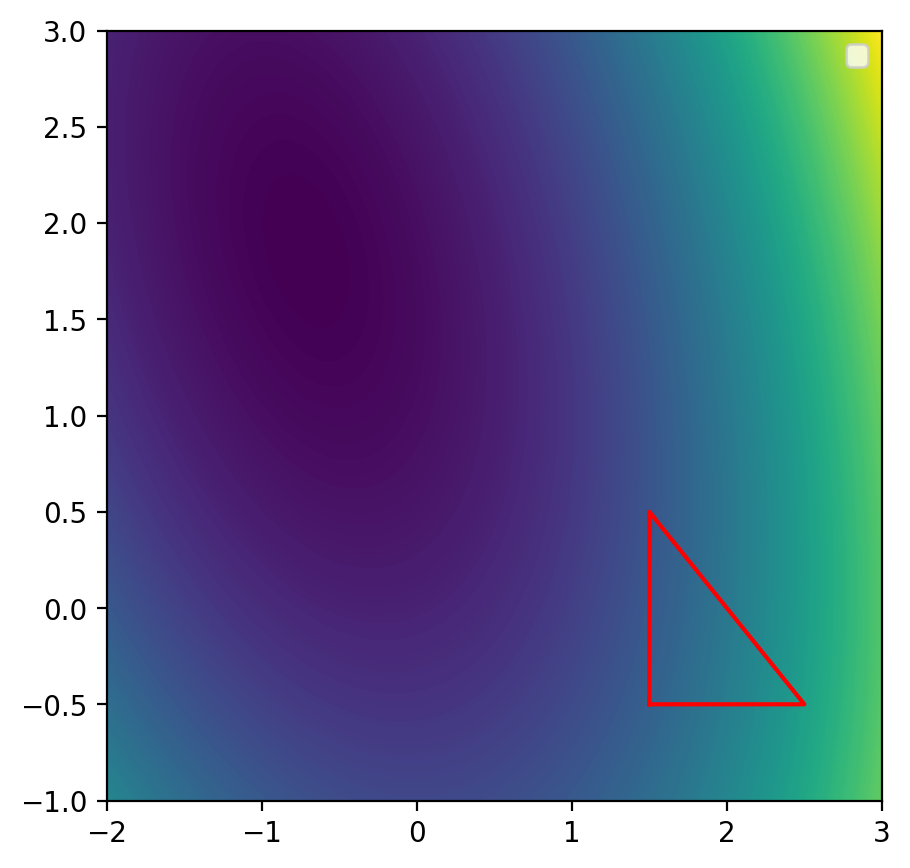

In [41]:
fig, ax = plt.subplots(dpi=200, figsize=(5,5))
# 100. * (x[i+1] - x[i]) * (x[i+1] - x[i]) + (1. - x[i]) * (1. - x[i])
x = np.linspace(-2, 3, 250)
y = np.linspace(-1, 3, 250)
X, Y = np.meshgrid(x, y)
Z = qfunc(X, Y)#100 * (Y-X**2)**2 +(1-X)**2

ax.contourf(X, Y, Z, levels=260)
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t
frame=0
# scat = ax.scatter([xy1[0][0], xy2[0][0], xy3[0][0]], [xy1[1][0], xy2[1][0], xy3[1][0]], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot([xy1[frame][0], xy2[frame][0], xy3[frame][0], xy1[frame][0],], [xy1[frame][1], xy2[frame][1], xy3[frame][1],xy1[frame][1],], color='r')[0]
# ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()

# ax.scatter([1], [1], marker='X', color='magenta', s=100)
def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    # data = np.stack([x, y]).T
    
    # line2 = ax.plot([xy1[0][frame], xy2[0][frame], xy3[0][frame], xy1[0][frame],], [xy1[1][frame], xy2[1][frame], xy3[1][frame],xy1[1][frame],], color='r')[0]
    # update the line plot:
    line2.set_xdata([xy1[frame][0], xy2[frame][0], xy3[frame][0], xy1[frame][0],])
    line2.set_ydata([xy1[frame][1], xy2[frame][1], xy3[frame][1],xy1[frame][1],])
    return line2


ani = animation.FuncAnimation(fig=fig, func=update, frames=60, interval=200)
# plt.show()
ani.save('nelder_mead_quad.gif', dpi=300)

In [28]:
xy1[1]

array([-1.,  2.])

In [17]:
xy2

array(<zip object at 0x7c1b7849d140>, dtype=object)